<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI/blob/main/Semana4/Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [66]:
X = np.array([-3,-2,-1,0,1])
Y = np.array([4,5,2,6,8])

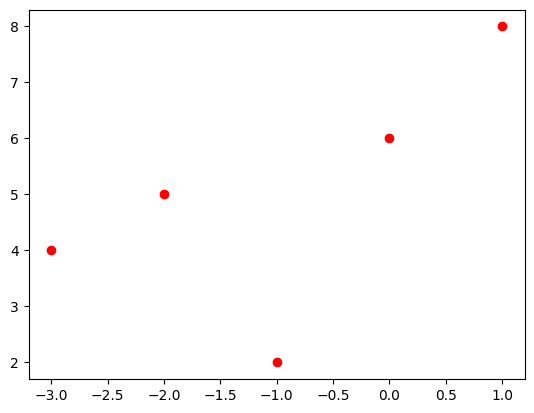

In [67]:
plt.scatter(X,Y,color='r')

In [68]:
x = sym.Symbol('x',real=True)
x

x

In [69]:
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x-X[j])/(X[i]-X[j])
  return L


In [70]:
Lagrange(x,X,0)

-x*(1/4 - x/4)*(-x - 2)*(-x/2 - 1/2)/3

In [71]:
Lagrange(x,X,1)

-x*(1/3 - x/3)*(-x - 1)*(x + 3)/2

In [72]:
Lagrange(x,X,2)

-x*(1/2 - x/2)*(x/2 + 3/2)*(x + 2)

In [73]:
Lagrange(x,X,2).subs(x,3)

45

In [74]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)
  return Poly

In [75]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

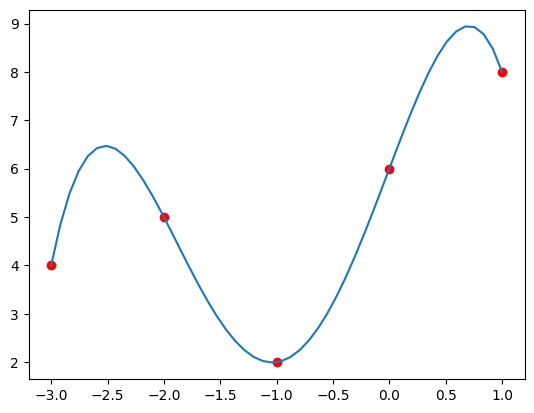

In [76]:
plt.scatter(X,Y,color='r')
plt.plot(x1,y1)

In [77]:
poly = Interpolate(x,X,Y)
poly = poly.expand()
poly

-5*x**4/6 - 19*x**3/6 - x**2/6 + 37*x/6 + 6

In [78]:
L0 = Lagrange(x,X,0)
L0

-x*(1/4 - x/4)*(-x - 2)*(-x/2 - 1/2)/3

In [79]:
DL0 = sym.diff(L0,x,1)
DL0

x*(1/4 - x/4)*(-x - 2)/6 + x*(1/4 - x/4)*(-x/2 - 1/2)/3 + x*(-x - 2)*(-x/2 - 1/2)/12 - (1/4 - x/4)*(-x - 2)*(-x/2 - 1/2)/3

In [80]:
DL0.subs(x,0)

-1/12

In [81]:
L1 = Lagrange(x,X,1)
L1

-x*(1/3 - x/3)*(-x - 1)*(x + 3)/2

In [82]:
DL1 = sym.diff(L1,x,1)
DL1

-x*(1/3 - x/3)*(-x - 1)/2 + x*(1/3 - x/3)*(x + 3)/2 + x*(-x - 1)*(x + 3)/6 - (1/3 - x/3)*(-x - 1)*(x + 3)/2

In [83]:
DL1.subs(x,0)

1/2

In [102]:
def funcion(x):
  return np.sin(x)*np.cos(x)

In [103]:
def DerivadaChula(f,x,h=1e-4):
  return (-1/12*f(x-3*h)+1/2*f(x-2*h)-18/12*(f(x-h))+10/12*f(x)+1/4*f(x+h))/h

In [104]:
x = np.linspace(0,2*np.pi,100)
y = DerivadaChula(funcion,x)

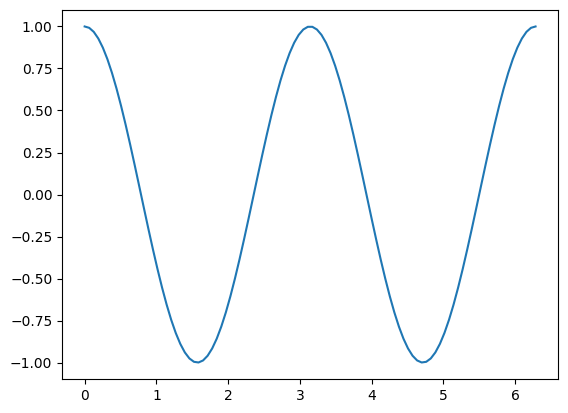

In [105]:
plt.plot(x,y)

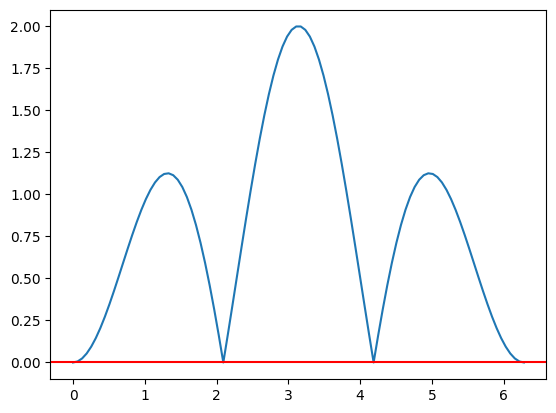

In [106]:
plt.plot(x,np.abs(np.cos(x)-y))
plt.axhline(y=0,color='r')
#plt.ylim(-0.5,0.5)